In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
path = r"C:\Users\user\Projetos\TCC\forecasting\temp_sul_01012000_31032000_treated.csv"
df_temp = pd.read_csv(path, parse_dates = ["DATA"])
df_temp_subset = df_temp[["DATA_HORA", "PRECIPITAÇÃO_TOTAL_HORÁRIO", 
                        "TEMPERATURA_DO_AR__BULBO_SECO_HORARIA", "TEMPERATURA_DO_PONTO_DE_ORVALHO", 
                        "TEMPERATURA_MÁXIMA_NA_HORA_ANT", "TEMPERATURA_MÍNIMA_NA_HORA_ANT",
                        "ESTACAO", "UF"]]

In [13]:
def download_carga_horaria(ano_inicio, ano_fim):
    url = "https://ons-dl-prod-opendata.s3.amazonaws.com/dataset/curva-carga-ho/CURVA_CARGA_{}.csv"

    df = pd.DataFrame()
    for ano in range(ano_inicio, ano_fim + 1):
        df2 = pd.read_csv(url.format(ano), sep = ";")
        df = pd.concat([df, df2])
        #print(f"Download do ano {ano} concluído.")
    df.columns = ["id_reg", "desc_reg", "time", "load_mwmed"]
    df.loc[:, "time"] = pd.to_datetime(df.loc[:, "time"], format = '%Y-%m-%d %H:%M:%S')
    return df

df_load = download_carga_horaria(2000, 2022)
df_load_sul = df_load[df_load["id_reg"] == "S"]

In [ ]:
df_temp.dtypes

DATA                                               datetime64[ns]
HORA                                                       object
PRECIPITAÇÃO_TOTAL_HORÁRIO                                float64
PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA           float64
PRESSÃO_ATMOSFERICA_MAXNA_HORA_ANT                        float64
PRESSÃO_ATMOSFERICA_MIN_NA_HORA_ANT                       float64
RADIACAO_GLOBAL                                           float64
TEMPERATURA_DO_AR__BULBO_SECO_HORARIA                     float64
TEMPERATURA_DO_PONTO_DE_ORVALHO                           float64
TEMPERATURA_MÁXIMA_NA_HORA_ANT                            float64
TEMPERATURA_MÍNIMA_NA_HORA_ANT                            float64
TEMPERATURA_ORVALHO_MAX_NA_HORA_ANT                       float64
TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT                       float64
UMIDADE_REL_MAX_NA_HORA_ANT                               float64
UMIDADE_REL_MIN_NA_HORA_ANT                               float64
UMIDADE_RE

In [ ]:
df_load.dtypes

id_reg                object
desc_reg              object
time          datetime64[ns]
load_mwmed           float64
dtype: object

In [ ]:
df_temp.head()

,DATA,HORA,PRECIPITAÇÃO_TOTAL_HORÁRIO,PRESSAO_ATMOSFERICA_AO_NIVEL_DA_ESTACAO_HORARIA,PRESSÃO_ATMOSFERICA_MAXNA_HORA_ANT,PRESSÃO_ATMOSFERICA_MIN_NA_HORA_ANT,RADIACAO_GLOBAL,TEMPERATURA_DO_AR__BULBO_SECO_HORARIA,TEMPERATURA_DO_PONTO_DE_ORVALHO,TEMPERATURA_MÁXIMA_NA_HORA_ANT,...,TEMPERATURA_ORVALHO_MIN_NA_HORA_ANT,UMIDADE_REL_MAX_NA_HORA_ANT,UMIDADE_REL_MIN_NA_HORA_ANT,UMIDADE_RELATIVA_DO_AR_HORARIA,VENTO_DIREÇÃO_HORARIA,VENTO_RAJADA_MAXIMA,VENTO_VELOCIDADE_HORARIA,ESTACAO,UF,DATA_HORA
0,2000-09-22,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,PORTO ALEGRE,RS,2000-09-22 00:00:00
1,2000-09-22,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,PORTO ALEGRE,RS,2000-09-22 01:00:00
2,2000-09-22,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,PORTO ALEGRE,RS,2000-09-22 02:00:00
3,2000-09-22,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,PORTO ALEGRE,RS,2000-09-22 03:00:00
4,2000-09-22,04:00,0.0,1013.9,1014.2,1013.2,-9999.0,15.5,14.6,15.6,...,14.6,95.0,94.0,94.0,231.0,4.4,1.2,PORTO ALEGRE,RS,2000-09-22 04:00:00


In [17]:
df_load_sul.head()

,id_reg,desc_reg,time,load_mwmed
2,S,SUL,2000-01-01 00:00:00,5777.0
6,S,SUL,2000-01-01 01:00:00,5580.7
10,S,SUL,2000-01-01 02:00:00,5098.7
14,S,SUL,2000-01-01 03:00:00,4753.7
18,S,SUL,2000-01-01 04:00:00,4584.1


In [24]:
df_temp_gb = df_temp_subset.groupby("DATA_HORA", as_index = False)["PRECIPITAÇÃO_TOTAL_HORÁRIO", "TEMPERATURA_DO_AR__BULBO_SECO_HORARIA", "TEMPERATURA_DO_PONTO_DE_ORVALHO"].mean()

<ipython-input-24-2fca454f4c8e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_temp_gb = df_temp_subset.groupby("DATA_HORA", as_index = False)["PRECIPITAÇÃO_TOTAL_HORÁRIO", "TEMPERATURA_DO_AR__BULBO_SECO_HORARIA", "TEMPERATURA_DO_PONTO_DE_ORVALHO"].mean()


In [28]:
df_temp_gb.loc[:, "DATA_HORA"] = pd.to_datetime(df_temp_gb.loc[:, "DATA_HORA"], format = "%Y-%m-%d %H:%M:%S")

In [41]:
df_temp_elec = pd.merge(df_temp_gb, df_load_sul[["time", "load_mwmed"]], left_on = "DATA_HORA", right_on = "time", how = "left")

# DADOS DE 2020 (HÁ VALORES VAZIOS (OU -9999) AO LONGO DO RESTANTE DA SÉRIE)
df_temp_elec_2020 = df_temp_elec[df_temp_elec["time"].dt.year == 2020]

In [44]:
df_temp_elec_2020.describe()

,PRECIPITAÇÃO_TOTAL_HORÁRIO,TEMPERATURA_DO_AR__BULBO_SECO_HORARIA,TEMPERATURA_DO_PONTO_DE_ORVALHO,load_mwmed
count,8784.000000,8784.000000,8784.000000,8784.000000
mean,0.147596,18.930168,13.454983,11286.047081
std,0.308816,5.188655,3.954567,2248.008269
min,0.000000,1.636620,-1.082609,6066.446000
25%,0.002326,15.341900,10.872875,9511.617250
50%,0.016359,19.030312,13.793628,11402.110500
75%,0.142500,22.618785,16.483171,12912.417000
max,3.154286,33.289773,22.423333,18160.606000


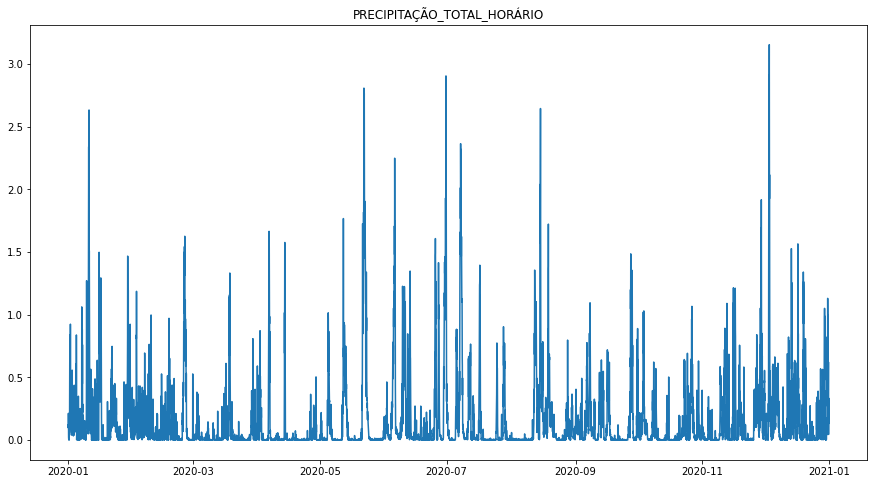

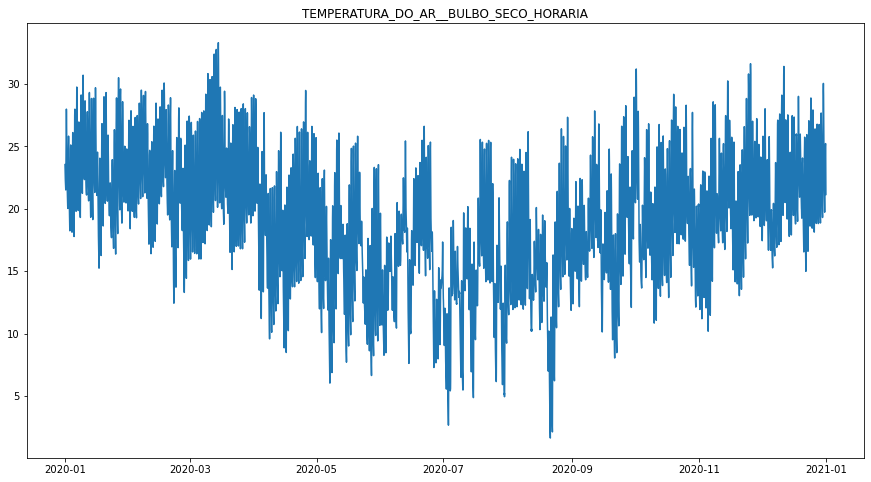

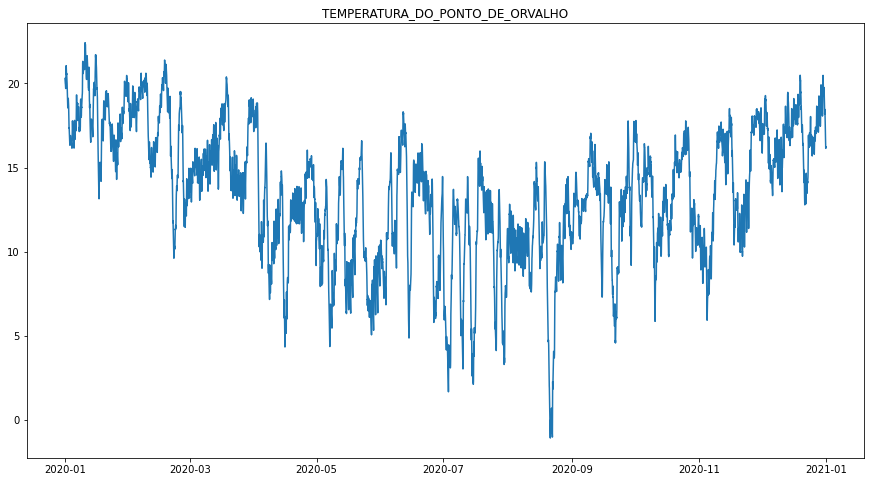

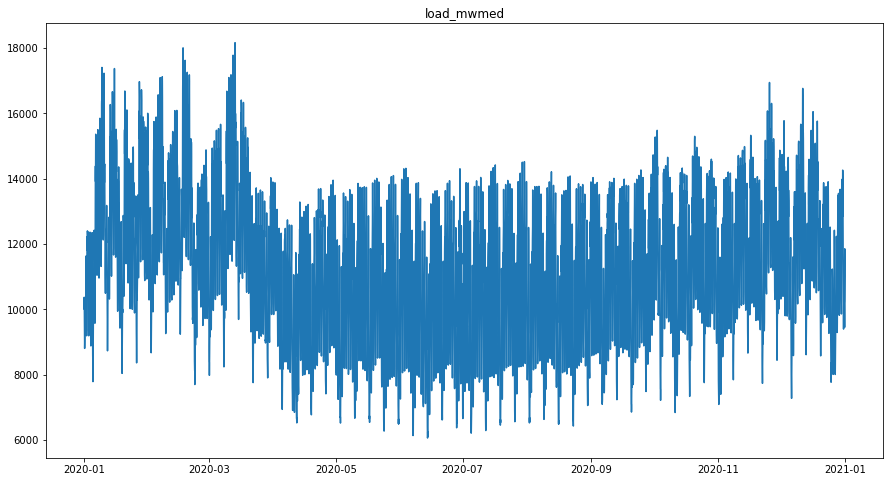

In [61]:
for col in df_temp_elec_2020.columns:
    if df_temp_elec_2020[col].dtype == '<M8[ns]':
        continue
    plt.figure(figsize = (15, 8))
    plt.plot(df_temp_elec_2020["DATA_HORA"], df_temp_elec_2020[col])
    plt.title(col)
    plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


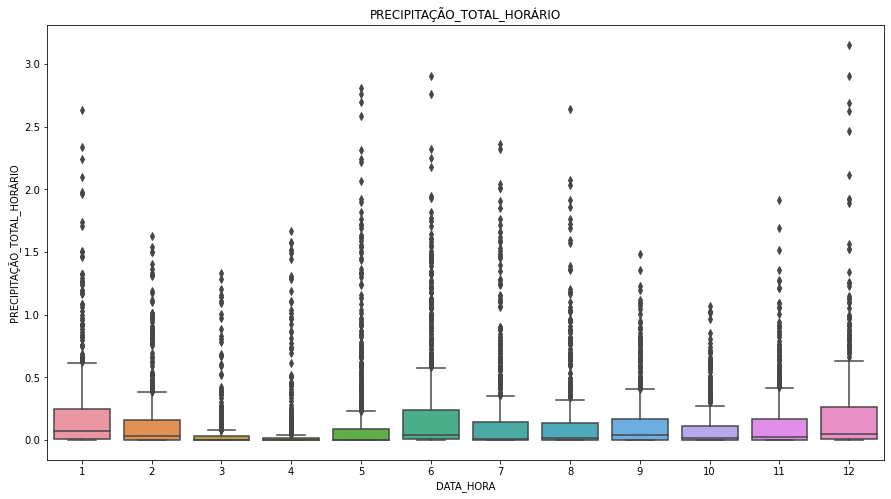

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


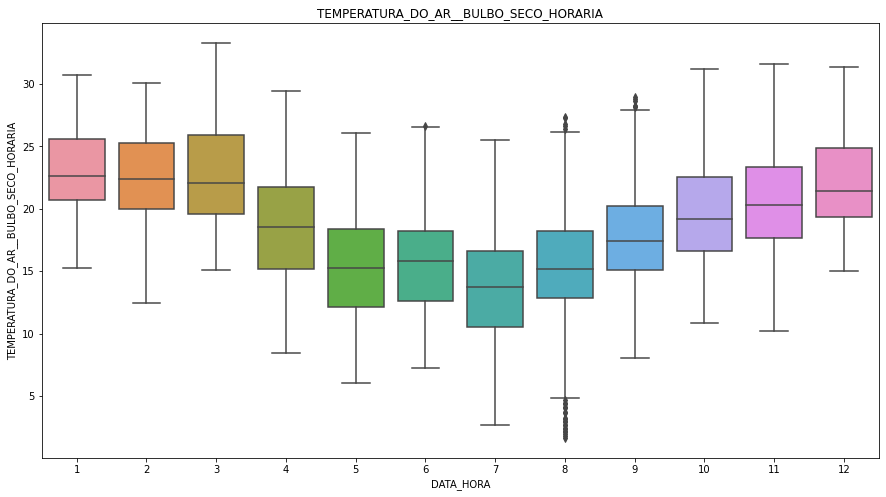

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


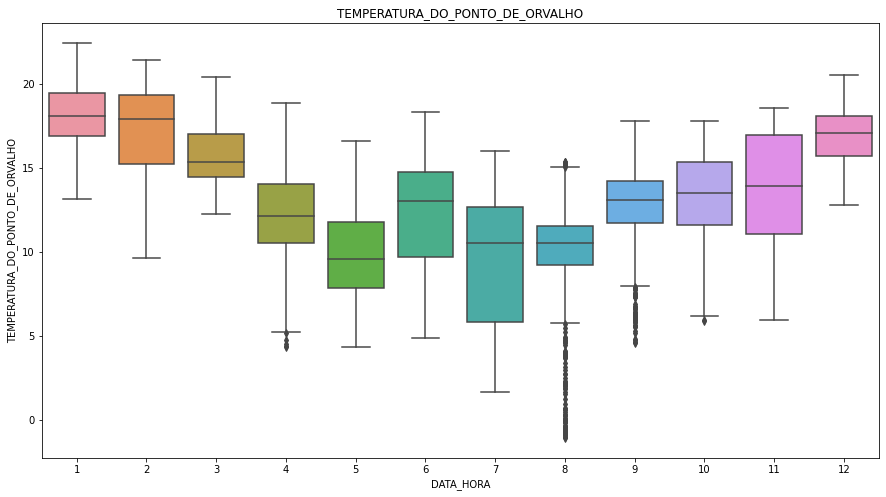

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


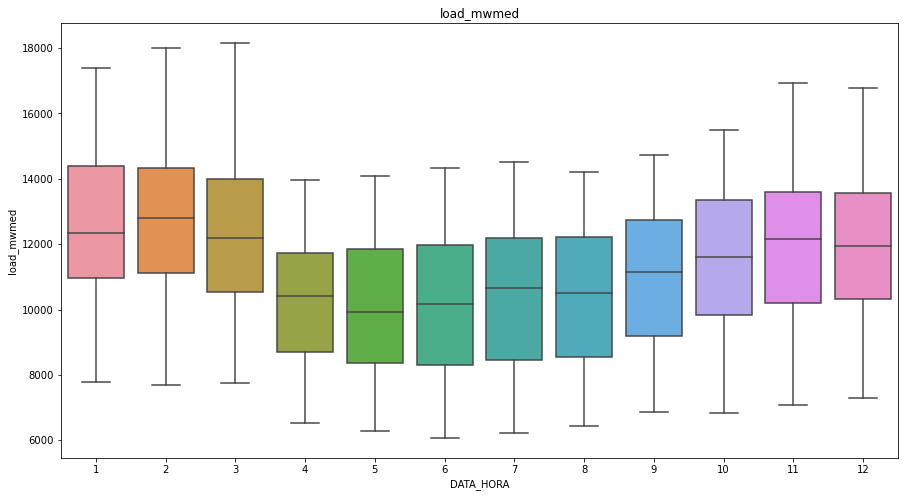

In [79]:
for col in df_temp_elec_2020.columns:
    if df_temp_elec_2020[col].dtype == '<M8[ns]':
        continue
    plt.figure(figsize = (15, 8))
    sns.boxplot(df_temp_elec_2020["DATA_HORA"].dt.month, df_temp_elec_2020[col])
    plt.title(col)
    plt.show()

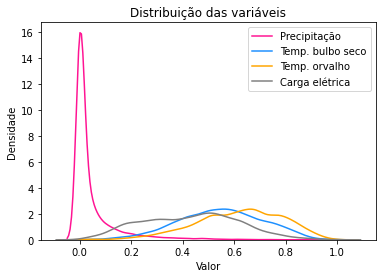

In [107]:
# NORMALIZANDO PARA VISUALIZAR TODAS VARIÁVEIS NO GRÁFICO DE DENSIDADE
df_temp_elec_norm = df_temp_elec_2020.copy(deep = True)
df_temp_elec_norm["PRECIPITAÇÃO_TOTAL_HORÁRIO"] = (df_temp_elec_norm["PRECIPITAÇÃO_TOTAL_HORÁRIO"]-df_temp_elec_norm["PRECIPITAÇÃO_TOTAL_HORÁRIO"].min())/(df_temp_elec_norm["PRECIPITAÇÃO_TOTAL_HORÁRIO"].max() - df_temp_elec_norm["PRECIPITAÇÃO_TOTAL_HORÁRIO"].min(0))
df_temp_elec_norm["TEMPERATURA_DO_AR__BULBO_SECO_HORARIA"] = (df_temp_elec_norm["TEMPERATURA_DO_AR__BULBO_SECO_HORARIA"]-df_temp_elec_norm["TEMPERATURA_DO_AR__BULBO_SECO_HORARIA"].min())/(df_temp_elec_norm["TEMPERATURA_DO_AR__BULBO_SECO_HORARIA"].max() - df_temp_elec_norm["TEMPERATURA_DO_AR__BULBO_SECO_HORARIA"].min())
df_temp_elec_norm["TEMPERATURA_DO_PONTO_DE_ORVALHO"] = (df_temp_elec_norm["TEMPERATURA_DO_PONTO_DE_ORVALHO"]-df_temp_elec_norm["TEMPERATURA_DO_PONTO_DE_ORVALHO"].min())/(df_temp_elec_norm["TEMPERATURA_DO_PONTO_DE_ORVALHO"].max() - df_temp_elec_norm["TEMPERATURA_DO_PONTO_DE_ORVALHO"].min())
df_temp_elec_norm["load_mwmed"] = (df_temp_elec_norm["load_mwmed"]-df_temp_elec_norm["load_mwmed"].min())/(df_temp_elec_norm["load_mwmed"].max() - df_temp_elec_norm["load_mwmed"].min())

# PLOTAGEM
sns.kdeplot(df_temp_elec_norm["PRECIPITAÇÃO_TOTAL_HORÁRIO"], color="deeppink", label="Precipitação", alpha=.7,)    # shade = True (preencher)
sns.kdeplot(df_temp_elec_norm["TEMPERATURA_DO_AR__BULBO_SECO_HORARIA"], color="dodgerblue", label="Temp. bulbo seco", alpha=.7)
sns.kdeplot(df_temp_elec_norm["TEMPERATURA_DO_PONTO_DE_ORVALHO"], color="orange", label="Temp. orvalho", alpha=.7)
sns.kdeplot(df_temp_elec_norm["load_mwmed"], color="gray", label="Carga elétrica", alpha=.7)

plt.legend()

plt.title("Distribuição das variáveis")
plt.xlabel("Valor")
plt.ylabel("Densidade")

plt.show()